# PLANOS PRE-PAGOS E SUAS RECEITAS

O presente estudo tem como escopo analisar como os usuários dos planos telefônicos pré-pagos - Surf e Ultimate - da empresa de telecomunicações Megaline utilizam os serviços contratados, para que seja possível identificar qual dos planos gera mais receita para a empresa, permitindo ao departamento comercial ajustar o orçamento de publicidade. Será analisado como os consumidores utilizam os serviços dos planos telefônicos, como ligações, mensagens e internet.

# Iniciação, Carregamento de Dados e Exploração de Dados

Carregaremos as bibliotecas e os dados do projeto para analisar as informações gerais. Inicialmente com os dados iremos observar as 10 linhas de cada conjunto de dados. 

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [79]:
#path='/datasets/'
path = 'C://Users//tha_s//Downloads//'
data = pd.read_csv(path + 'vehicles_us.csv')
print(data)

       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type 

In [80]:
#path='/datasets/'
path = 'C://Users//tha_s//Downloads//'

ligacoes = pd.read_csv(path + 'megaline_calls.csv')
net = pd.read_csv(path + 'megaline_internet.csv')
msg = pd.read_csv(path + 'megaline_messages.csv')
planos = pd.read_csv(path + 'megaline_plans.csv')
user = pd.read_csv(path + 'megaline_users.csv')

In [81]:
ligacoes.head(10)


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [82]:
ligacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [83]:
net.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [84]:
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [85]:
msg.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [86]:
msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [87]:
planos.head(10)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [88]:
planos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [89]:
user.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [90]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Inicialmente, verificamos que apenas o conjunto de dados 'user' possui uma coluna com valores ausentes. A coluna churn_date apresenta esses valores ausentes, mas como ela se refere ao término da contratação do plano, não processamos esses dados. A ausência provavelmente indica que o usuário continuou com o plano após o ano de 2018. Além disso, como essa coluna não influenciará diretamente nossa análise, podemos optar por removê-la.

Para uma análise mais detalhada, será necessário não apenas unir todas as tabelas, mas também criar algumas colunas adicionais que estão faltando, como uma coluna referente ao mês. Isso permitirá uma compreensão mais clara dos padrões de uso ao longo do tempo.

# Correção de dados

Como identificamos que os dados referentes a datas se apresentavam como objeto e para que possamos analisar os corrigiremos para que os dados conste como 'datetime'.  

In [91]:
ligacoes['call_date'] = pd.to_datetime(ligacoes['call_date'], format='%Y-%m-%d')
ligacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [92]:
net['session_date'] = pd.to_datetime(net['session_date'], format='%Y-%m-%d')
net.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [93]:
msg['message_date'] = pd.to_datetime(msg['message_date'], format='%Y-%m-%d')
msg.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [94]:
user['reg_date'] = pd.to_datetime(user['reg_date'], format='%Y-%m-%d')
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Corrigimos os dados das seguintes colunas e dataframe: 
- dataframe ligacoes - coluna 'call_date'
- dataframe net - coluna 'session_date'
- dataframe msg - coluna 'message_date'
- dataframe user - coluna 'reg_date'.

Com os dados corrigidos para datetime iremos enriquecer nossos dados. 

# Enriquecendo os dados

Nesse tópico, iremos enriquecer nossos dados para que tenhamos mais informações para realizar a análise à frente. Sabemos que a empresa Megaline arredonda segundos para minutos e megabytes para gigabytes e, assim, enriqueceremos os dados com uma nova coluna no dataframe 'net' para sabermos quantos GB os clientes usaram por mês e, também, criaremos uma nova coluna no dataframe 'ligações' para sabermos quantos minutos foram utilizados. Por fim, criaremos uma coluna com o mês nas tabelas para que possamos analisar a utilização dos serviços por mês.

In [95]:
ligacoes['duration'] = ligacoes['duration'].round()
ligacoes

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,14.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,4.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,8.0
137733,1499_202,1499,2018-10-10,0.0


In [96]:
net['gb'] = (net['mb_used'] / 1024).round()
net

,id,user_id,session_date,mb_used,gb
0,1000_13,1000,2018-12-29,89.86,0.0
1,1000_204,1000,2018-12-31,0.00,0.0
2,1000_379,1000,2018-12-28,660.40,1.0
3,1000_413,1000,2018-12-26,270.99,0.0
4,1000_442,1000,2018-12-27,880.22,1.0
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,0.0
104821,1499_216,1499,2018-12-30,304.72,0.0
104822,1499_217,1499,2018-09-22,292.75,0.0
104823,1499_218,1499,2018-12-07,0.00,0.0


Usando o método round, arredondamos os valores das ligações por minutos na coluna duration do dataframe ligações para valores inteiros. Em seguida, adicionamos uma coluna chamada gb ao dataframe net. Para determinar o valor dessa coluna, arredondamos os valores da coluna mb_used do dataframe net para que tivéssemos os valores em GB. Para isso, sabendo que 1 GB equivale a 1024 MB, dividimos a coluna por 1024 e aplicamos o método round.

In [97]:
ligacoes['month'] = ligacoes['call_date'].dt.month
ligacoes.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,14.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,4.0,12


In [98]:
net['month'] = net['session_date'].dt.month
net.head()

,id,user_id,session_date,mb_used,gb,month
0,1000_13,1000,2018-12-29,89.86,0.0,12
1,1000_204,1000,2018-12-31,0.00,0.0,12
2,1000_379,1000,2018-12-28,660.40,1.0,12
3,1000_413,1000,2018-12-26,270.99,0.0,12
4,1000_442,1000,2018-12-27,880.22,1.0,12


In [99]:
msg['month'] = msg['message_date'].dt.month
msg.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [100]:
user['month'] = user['reg_date'].dt.month
user.head() 

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,5


Para mais frente podermos analisar o consumo mensal dos serviços de ligações, mensagem, internet adicionamos a coluna mes nos dataframe ligações, net, msg, user. 

# Criação da Tabela Geral

Após a correção e enriquecimento dos dataframes e visando facilitar nossa análise, combinaremos os 5 dataframes em uma tabela única. Porém, antes de combiná-los, iremos fazer pivot tables para identificar o número de chamadas feitas e minutos usados por mês, o número de mensagens de texto enviadas por mês, e o volume de dados por mês para assim facilitar a criação de uma tabela única.

In [101]:
duracao_ligacao = ligacoes.pivot_table(index=['user_id','month'], values='duration', aggfunc= 'sum')
duracao_ligacao = duracao_ligacao.reset_index()
duracao_ligacao

,user_id,month,duration
0,1000,12,117.0
1,1001,8,173.0
2,1001,9,297.0
3,1001,10,374.0
4,1001,11,404.0
...,...,...,...
2253,1498,12,326.0
2254,1499,9,328.0
2255,1499,10,361.0
2256,1499,11,287.0


In [102]:
num_ligacoes = ligacoes.pivot_table(index=['user_id','month'], values='duration', aggfunc= 'count')
num_ligacoes = num_ligacoes.reset_index()
num_ligacoes

,user_id,month,duration
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [103]:
soma_net = net.pivot_table(index=['user_id','month'], values=['mb_used','gb'], aggfunc= 'sum')
soma_net = soma_net.reset_index()
soma_net

,user_id,month,gb,mb_used
0,1000,12,2.0,1901.47
1,1001,8,5.0,6919.15
2,1001,9,8.0,13314.82
3,1001,10,20.0,22330.49
4,1001,11,13.0,18504.30
...,...,...,...,...
2272,1498,12,22.0,23137.69
2273,1499,9,9.0,12984.76
2274,1499,10,12.0,19492.43
2275,1499,11,11.0,16813.83


In [104]:
soma_msg = msg.pivot_table(index=['user_id','month'], values='message_date', aggfunc= 'count')
soma_msg = soma_msg.reset_index()
soma_msg

,user_id,month,message_date
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [105]:
user_geral = user[['user_id', 'plan', 'city']]
user_geral

,user_id,plan,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [106]:
table1 = duracao_ligacao.merge(num_ligacoes, on=['user_id','month'], how='outer')
table2 = table1.merge(soma_net, on=['user_id','month'], how='outer')
table3 = table2.merge(soma_msg, on=['user_id','month'], how='outer')
table_geral = table3.merge(user_geral, on=['user_id'], how='outer')
table_geral.head(10)

,user_id,month,duration_x,duration_y,gb,mb_used,message_date,plan,city
0,1000,12.0,117.0,16.0,2.0,1901.47,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,173.0,27.0,5.0,6919.15,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,297.0,49.0,8.0,13314.82,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,374.0,65.0,20.0,22330.49,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,404.0,64.0,13.0,18504.30,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
5,1001,12.0,394.0,56.0,12.0,19369.18,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
6,1002,10.0,53.0,11.0,7.0,6552.01,15.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
7,1002,11.0,359.0,55.0,12.0,19345.08,32.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
8,1002,12.0,362.0,47.0,8.0,14396.24,41.0,surf,"Las Vegas-Henderson-Paradise, NV MSA"
9,1003,12.0,1040.0,149.0,25.0,27044.14,50.0,surf,"Tulsa, OK MSA"


In [107]:
table_geral = table_geral.rename(columns={"duration_x": "duracao_ligacao"})

In [108]:
table_geral = table_geral.rename(columns={"duration_y": "numero_ligacao"})

In [109]:
table_geral.head()

,user_id,month,duracao_ligacao,numero_ligacao,gb,mb_used,message_date,plan,city
0,1000,12.0,117.0,16.0,2.0,1901.47,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,173.0,27.0,5.0,6919.15,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,297.0,49.0,8.0,13314.82,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,374.0,65.0,20.0,22330.49,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,404.0,64.0,13.0,18504.30,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"


Fizemos as seguintes pivot tables:
- duracao_ligacao: para termos a duração das ligações feitas pelos usuários;
- num_ligacoes: para sabermos quantas ligações foram feitas pelos usuários;
- soma_net: para termos quanto de internet foi utilizado pelos usuários;
- user_geral: para sabermos as informações dos usuários, como cidade e plano que possuem.

Com a criação das pivot tables, conseguimos combinar as informações que julgamos mais importantes de cada dataframe e, utilizando o método merge, criamos uma tabela geral.

Após a criação da tabela, percebemos que, durante a combinação dos dados, houve a criação de duas colunas com nomes semelhantes, duration_x e duration_y. Assim, para termos uma tabela mais fácil de ser analisada, renomeamos as colunas referidas anteriormente para duracao_ligacao e numero_ligacao, respectivamente.

# Função para saber a utilização dos planos

Antes de passarmos à análise dos dados e já com a tabela geral criada, iremos verificar a receita mensal para cada usuário. Utilizaremos funções para ver como os usuários estão utilizando os serviços de cada plano e, com as informações, adicionaremos uma coluna na nossa tabela geral.

In [110]:
def minutos_mais(row):
    plan = row['plan']
    duracao_ligacao = row['duracao_ligacao']
    
    if plan == 'surf':
        if duracao_ligacao > 500:
            cobranca = duracao_ligacao - 500
        else:
            cobranca = 0
    
    if plan == 'ultimate':
        if duracao_ligacao > 3000:
            cobranca = duracao_ligacao - 3000
        else:
            cobranca = 0
            
    return cobranca

In [111]:
minutos_mais(table_geral.iloc[30])

275.0

In [112]:
table_geral['minutos_mais'] = table_geral.apply(minutos_mais, axis=1)

In [113]:
table_geral.head()

,user_id,month,duracao_ligacao,numero_ligacao,gb,mb_used,message_date,plan,city,minutos_mais
0,1000,12.0,117.0,16.0,2.0,1901.47,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0
1,1001,8.0,173.0,27.0,5.0,6919.15,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
2,1001,9.0,297.0,49.0,8.0,13314.82,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
3,1001,10.0,374.0,65.0,20.0,22330.49,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0
4,1001,11.0,404.0,64.0,13.0,18504.30,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0


In [114]:
def msg_mais(row):
    plan = row['plan']
    quant_msg = row['message_date']
    
    if plan == 'surf':
        if quant_msg > 50:
            cobranca = quant_msg - 50
        else:
            cobranca = 0
    
    if plan == 'ultimate':
        if quant_msg > 1000:
            cobranca = quant_msg - 1000
        else:
            cobranca = 0
            
    return cobranca 

In [115]:
msg_mais(table_geral.iloc[3])

3.0

In [116]:
table_geral['msg_mais'] = table_geral.apply(msg_mais, axis=1)

In [117]:
table_geral.head()

,user_id,month,duracao_ligacao,numero_ligacao,gb,mb_used,message_date,plan,city,minutos_mais,msg_mais
0,1000,12.0,117.0,16.0,2.0,1901.47,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0
1,1001,8.0,173.0,27.0,5.0,6919.15,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
2,1001,9.0,297.0,49.0,8.0,13314.82,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
3,1001,10.0,374.0,65.0,20.0,22330.49,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0
4,1001,11.0,404.0,64.0,13.0,18504.30,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0


In [118]:
def net_mais(row):
    plan = row['plan']
    quant_net = row['gb']
    
    if plan == 'surf':
        if quant_net > 15:
            cobranca = quant_net - 15
        else:
            cobranca = 0
    
    if plan == 'ultimate':
        if quant_net > 30:
            cobranca = quant_net - 30
        else:
            cobranca = 0
    
    return cobranca
                        

In [119]:
net_mais(table_geral.iloc[30])

5.0

In [120]:
table_geral['net_mais'] = table_geral.apply(net_mais, axis=1)

In [121]:
table_geral.head()

,user_id,month,duracao_ligacao,numero_ligacao,gb,mb_used,message_date,plan,city,minutos_mais,msg_mais,net_mais
0,1000,12.0,117.0,16.0,2.0,1901.47,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0
1,1001,8.0,173.0,27.0,5.0,6919.15,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
2,1001,9.0,297.0,49.0,8.0,13314.82,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0
3,1001,10.0,374.0,65.0,20.0,22330.49,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,5.0
4,1001,11.0,404.0,64.0,13.0,18504.30,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0


In [122]:
surf_valor_mensal = 20
surf_ligacao_mes = 500
surf_msg_mes = 50
surf_net_mes = 15
surf_ligacao_mais = 0.03
surf_msg_mais = 0.03
surf_net_mais = 10

ultimate_valor_mensal = 70
ultimate_ligacao_mes = 3000
ultimate_msg_mes = 1000
ultimate_net_mes = 30
ultimate_ligacao_mais = 0.01
ultimate_msg_mais = 0.01
ultimate_net_mais = 7

In [123]:
def utilizacao_mensal(row):
    plan = row ['plan']
    cobranca_ligacao = row ['minutos_mais']
    cobranca_msg = row ['msg_mais']
    cobranca_net = row ['net_mais']
    
    if plan == 'surf':
        cobranca = surf_valor_mensal + ((cobranca_ligacao * surf_ligacao_mais) + (cobranca_msg * surf_msg_mais) + (cobranca_net * surf_net_mais))
    else:
        cobranca = ultimate_valor_mensal + ((cobranca_ligacao * ultimate_ligacao_mais) + (cobranca_msg * ultimate_msg_mais) + (cobranca_net * ultimate_net_mais))
    return cobranca    

In [124]:
table_geral['utilizacao_mensal'] = table_geral.apply(utilizacao_mensal, axis=1)
table_geral.head(25)

,user_id,month,duracao_ligacao,numero_ligacao,gb,mb_used,message_date,plan,city,minutos_mais,msg_mais,net_mais,utilizacao_mensal
0,1000,12.0,117.0,16.0,2.0,1901.47,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,70.00
1,1001,8.0,173.0,27.0,5.0,6919.15,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
2,1001,9.0,297.0,49.0,8.0,13314.82,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
3,1001,10.0,374.0,65.0,20.0,22330.49,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,3.0,5.0,70.09
4,1001,11.0,404.0,64.0,13.0,18504.30,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
5,1001,12.0,394.0,56.0,12.0,19369.18,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,20.00
6,1002,10.0,53.0,11.0,7.0,6552.01,15.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0,0.0,20.00
7,1002,11.0,359.0,55.0,12.0,19345.08,32.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0,0.0,20.00
8,1002,12.0,362.0,47.0,8.0,14396.24,41.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",0.0,0.0,0.0,20.00
9,1003,12.0,1040.0,149.0,25.0,27044.14,50.0,surf,"Tulsa, OK MSA",540.0,0.0,10.0,136.20


Antes de criarmos uma função para conseguirmos checar a receita mensal para cada usuário de cada plano, criamos as seguintes funções:
- minutos_mais: para sabermos quais usuários estavam utilizando minutos a mais do plano contratado e quantos minutos seriam;
- msg_mais: para sabermos quais usuários estavam enviando mensagens a mais do plano contratado e quantas mensagens seriam;
- net_mais: para sabermos quais usuários estavam utilizando internet a mais do plano contratado e quantos GB seriam.

Com cada uma dessas funções, criamos três colunas — minutos_mais, msg_mais e net_mais — na nossa tabela geral, respectivamente. Tendo essas três colunas e sabendo o valor dos serviços quando excedentes, conseguimos então criar uma função para calcular quanto cada usuário de cada plano tem pago por mês.

Para essa função, pegamos cada plano telefônico e adicionamos o preço mensal com o valor de cada coluna criada anteriormente vezes o respectivo valor excedente por serviço. Com os cálculos realizados, criamos na tabela geral a coluna utilização_mensal.

# Análise de dados 

Com todo o tratamento de dados realizado, começaremos nossa análise para descrever o comportamento dos clientes. Para isso, iremos verificar os minutos, mensagens de texto e volume de dados que os usuários de cada plano utilizam por mês. Calcularemos a média, variância e o desvio padrão, bem como descreveremos as distribuições. Por fim, construiremos histogramas para visualizar a distribuição desses dados.

In [125]:
table_geral.query('plan == "surf"')['duracao_ligacao'].max()

1433.0

In [126]:
table_geral.query('plan == "surf"')['duracao_ligacao'].mean()

411.9747572815534

In [127]:
table_geral.query('plan == "surf"')['duracao_ligacao'].median()

406.0

In [128]:
table_geral.query('plan == "ultimate"')['duracao_ligacao'].max()

1297.0

In [129]:
table_geral.query('plan == "ultimate"')['duracao_ligacao'].mean()

410.1037868162693

In [130]:
table_geral.query('plan == "ultimate"')['duracao_ligacao'].median()

401.0

In [131]:
var_lig_surf = np.var(table_geral.query('plan == "surf"')['duracao_ligacao'])
var_lig_surf

46918.67703270805

In [132]:
var_lig_ult = np.var(table_geral.query('plan == "ultimate"')['duracao_ligacao'])
var_lig_ult

50395.32162661379

In [133]:
ligacoes_desvio_surf = np.sqrt(var_lig_surf)
ligacoes_desvio_surf

216.60719524685243

In [134]:
ligacoes_desvio_ult = np.sqrt(var_lig_ult)
ligacoes_desvio_ult

224.48902339894883

Quanto à quantidade de ligações realizadas pelos usuários dos planos, pudemos observar que a distribuição foi normal. A média de ligações por mês para cada plano é bastante semelhante: o plano Surf tem uma média de 411,9 ligações, enquanto o plano Ultimate tem uma média de 410,10 ligações. Em relação ao desvio padrão, verificamos que no plano Surf é de 216,6, e no plano Ultimate é de 224,4.

Esses resultados indicam que, apesar das médias serem próximas, há uma ligeira variação na dispersão das ligações entre os dois planos. O desvio padrão maior no plano Ultimate sugere que há um pouco mais de variabilidade no número de ligações realizadas pelos usuários desse plano em comparação ao plano Surf.

In [135]:
table_geral.query('plan == "surf"')['message_date'].max()

266.0

In [136]:
table_geral.query('plan == "surf"')['message_date'].mean()

40.10965630114566

In [137]:
table_geral.query('plan == "surf"')['message_date'].median()

32.0

In [138]:
table_geral.query('plan == "ultimate"')['message_date'].max()

166.0

In [139]:
table_geral.query('plan == "ultimate"')['message_date'].mean()

46.29623287671233

In [140]:
table_geral.query('plan == "ultimate"')['message_date'].median()

41.0

In [141]:
var_msg_surf = np.var(table_geral.query('plan == "surf"')['message_date'])
var_msg_surf

1090.4511506183703

In [142]:
var_msg_ult = np.var(table_geral.query('plan == "ultimate"')['message_date'])
var_msg_ult

1083.3249173156323

In [143]:
msg_desvio_surf = np.sqrt(var_msg_surf)
msg_desvio_surf

33.02197981070139

In [144]:
msg_desvio_ult = np.sqrt(var_msg_ult)
msg_desvio_ult

32.91390158148426

A distribuição da quantidade de mensagens enviadas mensalmente pelos usuários parece ser normal. Observamos que a média de mensagens enviadas pelos usuários do plano Surf é de 40,1, enquanto a média do plano Ultimate é de 46,2, indicando que os usuários do plano Ultimate enviam, em média, mais mensagens.

Apesar dessa diferença nas médias, os desvios padrão dos planos Surf e Ultimate são bastante similares: 33,0 para o plano Surf e 32,9 para o plano Ultimate. Isso sugere que, embora o plano Ultimate tenha uma média maior de mensagens enviadas, a variabilidade no número de mensagens entre os usuários dos dois planos é bastante comparável.

In [145]:
table_geral.query('plan == "surf"')['gb'].max()

70.0

In [146]:
table_geral.query('plan == "surf"')['gb'].mean()

13.383183568677792

In [147]:
table_geral.query('plan == "surf"')['gb'].median()

12.0

In [148]:
table_geral.query('plan == "ultimate"')['gb'].max()

44.0

In [149]:
table_geral.query('plan == "ultimate"')['gb'].mean()

14.016689847009737

In [150]:
table_geral.query('plan == "ultimate"')['gb'].median()

12.0

In [151]:
var_net_surf = np.var(table_geral.query('plan == "surf"')['gb'])
var_net_surf

61.4635682987802

In [152]:
var_net_ult = np.var(table_geral.query('plan == "ultimate"')['gb'])
var_net_ult

64.33630003036961

In [153]:
net_desvio_surf = np.sqrt(var_net_surf)
net_desvio_surf

7.839870426147374

In [154]:
net_desvio_ult = np.sqrt(var_net_ult)
net_desvio_ult

8.020991212460565

A distribuição da quantidade de internet usada mensalmente pelos usuários também parece ser normal. Observamos que a média de uso de internet é exatamente a mesma para ambos os planos, Surf e Ultimate, sendo 13,0 GB.

Além disso, os desvios padrão são bastante similares: 8,1 GB para o plano Surf e 8,2 GB para o plano Ultimate. Isso indica que, embora a média de uso de internet seja idêntica para os dois planos, a variabilidade no consumo de internet entre os usuários é praticamente a mesma para ambos.

# Histograma

Para continuar a análise, criaremos 3 histogramas para comparar a utilização dos serviços realizados pelos usuários de cada plano. Faremos os seguintes histogramas:

- Para o serviço de ligações: compararemos a duração das ligações feitas.
- Para o serviço de mensagens: compararemos a quantidade de mensagens enviadas.
- Para o serviço de internet: compararemos a quantidade de internet utilizada.

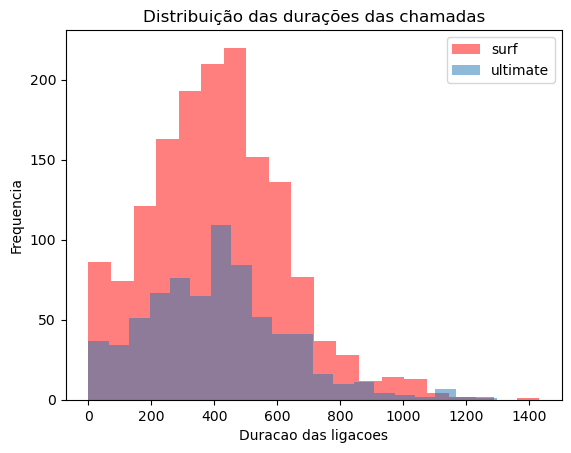

In [155]:
surf_ligacoes = table_geral.query('plan == "surf"')['duracao_ligacao']
ultimate_ligacoes = table_geral.query('plan == "ultimate"')['duracao_ligacao']

plt.hist(surf_ligacoes, bins=20, alpha=0.5, label='surf', color = 'red')
plt.hist(ultimate_ligacoes, bins=20, alpha=0.5, label='ultimate')

plt.xlabel('Duracao das ligacoes')
plt.ylabel('Frequencia')
plt.title('Distribuição das durações das chamadas')

plt.legend()

plt.show()

Conforme o histograma acima, pudemos verificar que a grande maioria dos usuários do plano Surf utilizou apenas os minutos disponíveis no plano mensal, mas o restante excedeu o limite mensal e usou mais minutos do que estavam contratados. Já quanto aos usuários do plano Ultimate, que tinham 3000 minutos para utilizar mensalmente, constatamos que nenhum se aproximou do limite de minutos, e a utilização foi baixa se comparada com o que tinham disponível.

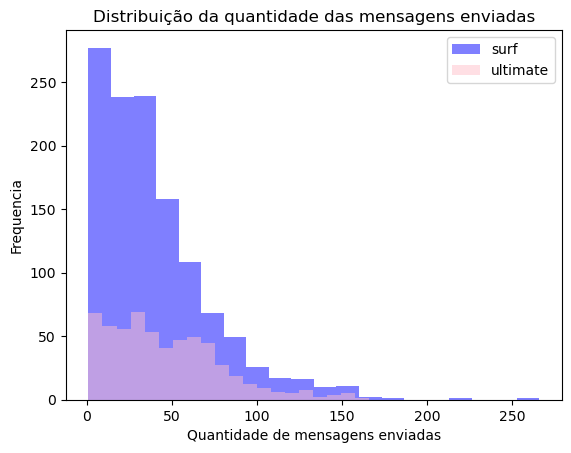

In [156]:
surf_msg = table_geral.query('plan == "surf"')['message_date']
ultimate_msg = table_geral.query('plan == "ultimate"')['message_date']

plt.hist(surf_msg, bins=20, alpha=0.5, label='surf', color= 'blue')
plt.hist(ultimate_msg, bins=20, alpha=0.5, label='ultimate', color= 'pink')

plt.xlabel('Quantidade de mensagens enviadas')
plt.ylabel('Frequencia')
plt.title('Distribuição da quantidade das mensagens enviadas')

plt.legend()

plt.show()

No histograma quanto à quantidade de mensagens enviadas, pudemos verificar que grande parte dos usuários do plano Surf enviaram mensagens até o limite disponível pelo plano mensal, que seria 50 mensagens por mês. No entanto, houve uma quantidade razoável de usuários que enviaram mais de 50 mensagens e excederam o limite contratado. Diferentemente, os usuários do plano Ultimate têm mensalmente 1000 mensagens disponíveis e pudemos verificar que a grande maioria envia de 0 a mais ou menos 75 mensagens, ou seja, muito menos do que o plano dispõe.

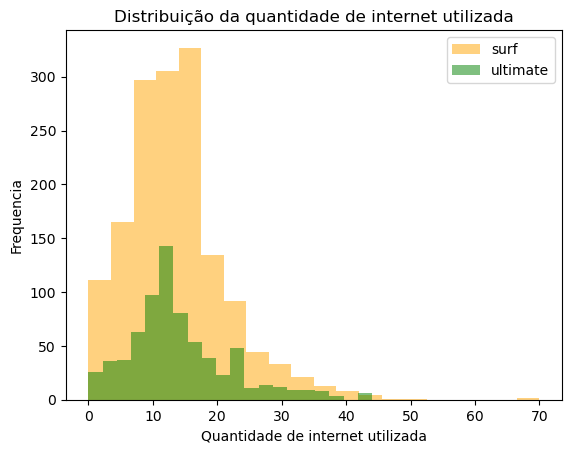

In [157]:
surf_net = table_geral.query('plan == "surf"')['gb']
ultimate_net = table_geral.query('plan == "ultimate"')['gb']

plt.hist(surf_net, bins=20, alpha=0.5, label='surf', color = 'orange')
plt.hist(ultimate_net, bins=20, alpha=0.5, label='ultimate', color = 'green')

plt.xlabel('Quantidade de internet utilizada')
plt.ylabel('Frequencia')
plt.title('Distribuição da quantidade de internet utilizada')

plt.legend()

plt.show()

De acordo com o histograma de distribuição da quantidade de internet utilizada, nota-se que, quanto aos usuários do plano Surf, que dispõe de 15 GB de internet mensais, há um pico indicando que mais de 350 usuários utilizam o GB total disponível e há também muitos usuários que excedem a quantidade de internet contratada. Já no plano Ultimate, que dispõe de 30 GB de internet mensais, há um pico de usuários que utilizam entre 5 a 15 GB, e também observamos um número considerável de usuários que ultrapassam os GB mensais disponíveis.

# Teste as hipóteses

Com os dados analisados agora iremos testar as hipóteses.

Abaixo testaremos a hipóteses sobre a receita média dos usuários dos planos Ultimate e Surf. Formulamos da seguinte forma:  
- Hipótese nula = "A receita média dos usuários dos planos Ultimate e Surf são iguais.
- Hipótese alternativa = "A receita média dos usuários dos planos Ultimate e Surf são diferentes.

In [158]:
alpha = 0.05
sample_1 = table_geral.query('plan == "surf"')['utilizacao_mensal']
sample_2 = table_geral.query('plan == "ultimate"') ['utilizacao_mensal']
results = st.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print ("Rejeitamos a hipótese nula")
else:
    print ("Nós não podemos rejeitar a hipótese nula")

p-value:  7.979369729090633e-86
Rejeitamos a hipótese nula


Como resultado da primeira hipóteses testada rejeitamos a hipóteses nula, ou seja, assumimos que há diferença signitivativa entre a receita média dos usuários dos planos Ultimate e Surf.


Agora testaremos a hipótese sobre a receita média dos usuários da área de NY-NJ e dos usuários de outras regiões. Nesse caso, formularemos da seguinte forma: 
- Hipótese nula = A receita média dos usuários da área de NY-NJ é igual à receita média dos usuários de outras regiões
- Hipótese alternativa = A receita média dos usuários da área de NY-NJ é diferente da receita média dos usuários de outras regiões


In [159]:
alpha = 0.05

sample_1 = table_geral[table_geral['city'].str.contains('NY-NJ')]
sample_2 = table_geral[~table_geral['city'].str.contains('NY-NJ')]
results = st.ttest_ind(sample_1['utilizacao_mensal'], sample_2['utilizacao_mensal'], equal_var = False)

print('p-value: ', results.pvalue)

if results.pvalue > alpha:
    print ("Rejeitamos a hipótese nula")
else:
    print ("Nós não podemos rejeitar a hipótese nula")

p-value:  0.00072392463627668
Nós não podemos rejeitar a hipótese nula


Na segunda hipótese testada temos como resultado que nao podemos rejeitar a hipótese nula, ou seja, assumimos que nao há diferença signitivativa entre a receita média dos usuários da área de NY-NJ e dos usuários de outras regiões.

Após formularmos as hipóteses para testarmos, definimos para as duas hipóteses o nível de significância (α) do teste em um nível de 5%, ou seja, α = 0,05. Também em ambas utilizamos a coluna utilizacao_mensal da tabela geral.

Na primeira hipótese, definimos que se o resultado do p-value fosse menor que o valor do α, rejeitaríamos a hipótese nula; caso contrário, não a rejeitaríamos. Já na segunda hipótese, definimos que se o valor p fosse maior que o nível de significância de 0,05, rejeitaríamos a hipótese rejeitada e, caso contrário, iríamos rejeitar a hipótese nula.

Portanto, concluímos que:
- A receita média dos usuários dos planos Ultimate e Surf é diferente.
- A receita média dos usuários da área de NY-NJ não é diferente dos usuários de outras regiões.

# CONCLUSAO

No presente estudo, buscamos analisar como os usuários dos planos telefônicos pré-pagos — Surf e Ultimate — da empresa de telecomunicações Megaline utilizam os serviços contratados, para que seja possível identificar qual dos planos dá mais receita à empresa, permitindo que o departamento comercial ajuste o orçamento de publicidade.

Carregamos as bibliotecas e os dados, exploramos os dados, corrigindo-os e enriquecendo-os. Ademais, mesclamos todas as tabelas em uma tabela geral e assim criamos funções para que pudéssemos calcular a receita mensal para cada usuário de cada plano, adicionando colunas na tabela geral para melhor nos ajudar na nossa análise.

Da análise de dados quanto à utilização dos usuários de ambos os planos aos serviços de ligações, envio de mensagens e internet, pudemos verificar que:
- A distribuição era normal para ambos os planos e todos os serviços oferecidos.
- Quanto à média de utilização do serviço de ligações, os planos eram bem semelhantes: Surf 411,9 e Ultimate 410,1.
- Quanto à média de utilização do serviço de mensagens, o plano Surf tinha o valor de 40,1 e o plano Ultimate de 46,2, sendo mais alto.
- Quanto à média de utilização do serviço de internet, ambos os planos tinham o valor de 13,0.
- Quanto ao desvio padrão de utilização do serviço de ligações, os valores eram: Surf 216,6 e Ultimate 224,4.
- Quanto ao desvio padrão de utilização do serviço de mensagens, os valores eram similares: Surf 33,0 e Ultimate 32,9.
- Quanto ao desvio padrão de utilização do serviço de internet, os valores também eram similares: Surf 8,1 e Ultimate 8,2.

Também, seguindo a análise, criaremos 3 histogramas para comparar a utilização dos serviços realizados pelos usuários de cada plano e pudemos analisar que:
- Entre os usuários do plano Surf, tivemos os que apenas usaram os serviços disponíveis no plano, mas também aqueles que excederam o limite do plano mensal. Já quanto aos usuários do plano Ultimate, nenhum se aproximou do limite de minutos, e a utilização foi baixa se comparada ao que tinham disponível.
- Quanto à quantidade de mensagens enviadas, grande parte dos usuários do plano Surf enviou mensagens até o limite do que seria disponível pelo plano mensal; porém, houve uma quantidade razoável que excedeu o limite contratado. Diferentemente, os usuários do plano Ultimate, a grande maioria enviou de 0 a mais ou menos 75 mensagens, ou seja, muito menos do que o plano dispõe.
- Quanto à distribuição da quantidade de internet utilizada, mais de 350 usuários do plano Surf, que dispõe de 15 GB de internet mensais, utilizaram o GB total disponível, e muitos usuários excederam o limite contratado. Já no plano Ultimate, que dispõe de 30 GB de internet mensais, apesar de muitos usuários utilizarem apenas entre 5 a 15 GB, também há um número considerável de usuários que ultrapassaram os GB mensais disponíveis.

Testamos as duas hipóteses de que a receita média dos usuários dos planos Ultimate e Surf é diferente e de que a receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões e pudemos concluir que:
- A receita média dos usuários dos planos Ultimate e Surf não é diferente.
- A receita média dos usuários da área de NY-NJ não é diferente dos usuários de outras regiões.

Por fim, concluímos que o plano que dá mais receita para a empresa Megaline seria o plano Surf, tendo em vista que muitos usuários utilizam os serviços além do que o plano oferece mensalmente e, assim, excedem o limite mensal de minutos por ligação, mensagens enviadas e internet, e precisam pagar valores maiores do que aqueles inicialmente contratados. Verificamos também que muitos usuários do plano Surf possuem hábitos que seriam mais compatíveis com o que o plano Ultimate oferece. Assim, uma outra alternativa seria focar em levar os usuários com esse perfil para o plano Ultimate, divulgando os benefícios e valores desse plano.